In [43]:
#import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
# Import scikit-learn modules
from sklearn.model_selection import train_test_split

In [46]:
# Model and evaluation metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [47]:
df = pd.read_csv('updated_pollution_dataset.csv')

# EDA

In [48]:
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [49]:
df.shape

(5000, 10)

dataset memiliki 5000 baris dan 10 kolom. Artinya, dataset ini terdiri dari 5000 sampel data dengan 10 fitur yang berbeda, termasuk variabel target Air Quality dan fitur-fitur lainnya seperti suhu, kelembaban, dan konsentrasi polutan.

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


Dataset ini memiliki 5000 entri (baris) dan 10 kolom. Semua kolom, kecuali kolom Air Quality, memiliki tipe data float64, yang menunjukkan bahwa data tersebut berupa angka desimal. Kolom Air Quality bertipe object, yang berarti kolom ini berisi nilai kategorikal (seperti Good, Moderate, atau Hazardous). Selain itu, semua kolom memiliki non-null count yang sama dengan jumlah total entri (5000), yang berarti tidak ada nilai yang hilang pada dataset ini.

In [51]:
df.isna().sum()

,0
Temperature,0
Humidity,0
PM2.5,0
PM10,0
NO2,0
SO2,0
CO,0
Proximity_to_Industrial_Areas,0
Population_Density,0
Air Quality,0


memeriksa jumlah nilai yang hilang (missing values) dalam setiap kolom dataset. Hasilnya menunjukkan bahwa tidak ada kolom yang memiliki nilai hilang (semua nilai adalah 0), yang berarti dataset ini lengkap dan tidak perlu penanganan nilai yang hilang. Semua kolom, termasuk Air Quality, memiliki data yang lengkap.

In [52]:
categorical = df.select_dtypes(include=['category']).columns.values
numerical = df.select_dtypes(include=['number']).columns.values
print('categorical variables: ' + str(categorical))
print('numerical variables: ' + str(numerical))

categorical variables: []
numerical variables: ['Temperature' 'Humidity' 'PM2.5' 'PM10' 'NO2' 'SO2' 'CO'
 'Proximity_to_Industrial_Areas' 'Population_Density']


Pada dataset ini, tidak ditemukan variabel dengan tipe data kategorikal (category). Semua kolom dalam dataset, kecuali kolom **Air Quality**, memiliki tipe data numerikal (number). Variabel numerikal yang ada meliputi **Temperature**, **Humidity**, **PM2.5**, **PM10**, **NO2**, **SO2**, **CO**, **Proximity_to_Industrial_Areas**, dan **Population_Density**, yang semuanya berisi nilai numerik. Sementara itu, kolom **Air Quality** merupakan satu-satunya kolom kategorikal yang menyatakan kualitas udara dengan kategori seperti **Good**, **Moderate**, dan **Hazardous**.

<Axes: xlabel='Air Quality'>

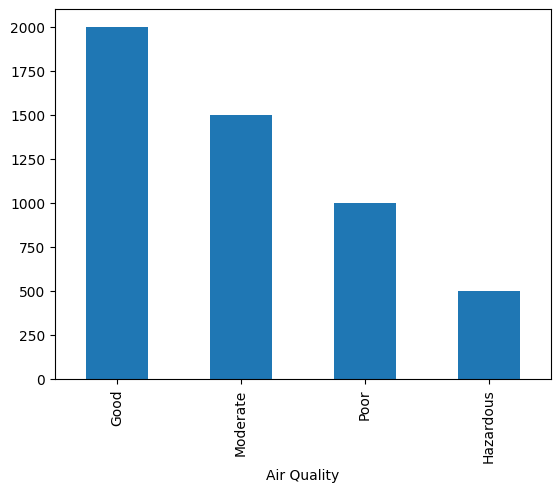

In [53]:
df['Air Quality'].value_counts().plot(kind='bar')

kategori Good memiliki jumlah data terbanyak, diikuti oleh Moderate dan Poor, sementara kategori Hazardous memiliki jumlah yang paling sedikit. Grafik ini memberikan gambaran tentang seberapa seimbang distribusi kualitas udara dalam dataset, dengan kecenderungan mayoritas data berada pada kualitas udara yang lebih baik (Good dan Moderate).

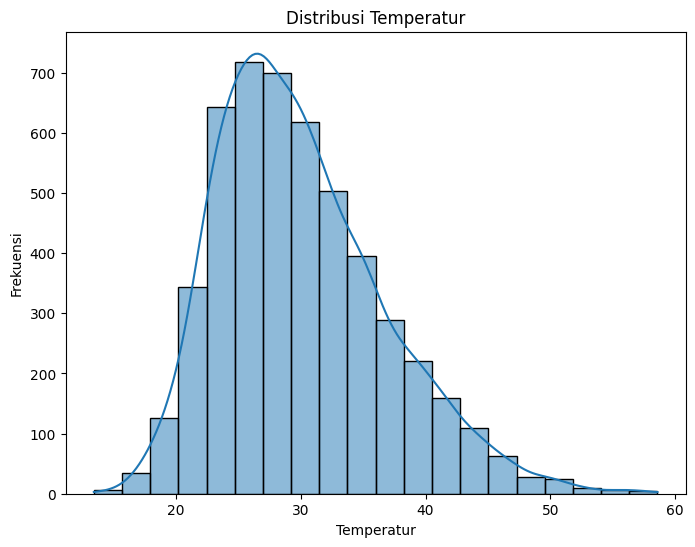

In [54]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Temperature'], bins=20, kde=True)
plt.title('Distribusi Temperatur')
plt.xlabel('Temperatur')
plt.ylabel('Frekuensi')
plt.show()

distribusi temperatur menunjukkan data dengan rentang nilai yang lebih besar (mungkin antara 20 hingga 50).

Data ini cenderung memiliki skala yang lebih besar, dengan variasi yang lebih lebar di sepanjang sumbu horizontal (temperatur).

In [56]:
# Feature dan label
X= df.drop('Air Quality', axis=1)
y= df['Air Quality']

In [57]:
X.shape

(5000, 9)

<Axes: >

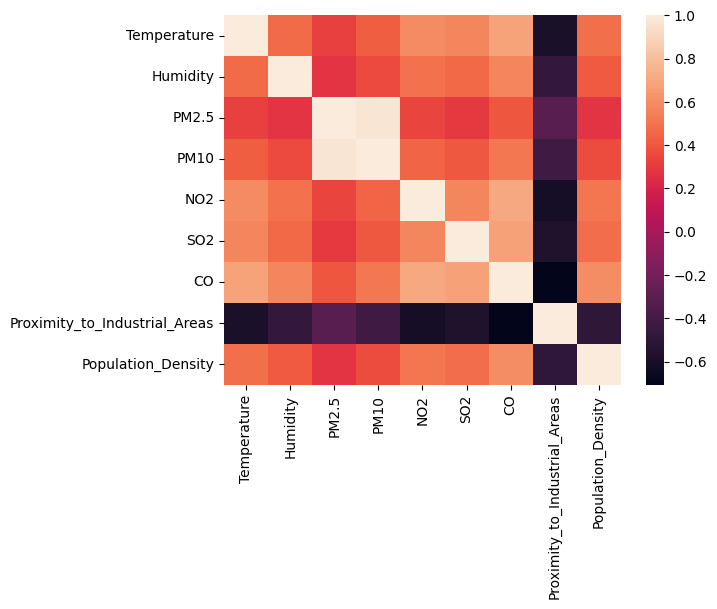

In [58]:
corr_matrix= X.corr()
sns.heatmap(corr_matrix)

Setiap sel dalam heatmap menggambarkan korelasi Pearson antara dua fitur yang berbeda, dengan warna yang lebih gelap menunjukkan korelasi yang lebih kuat. Sebagai contoh, PM2.5 dan PM10 memiliki korelasi positif yang sangat tinggi, yang terlihat dengan warna merah tua, menunjukkan bahwa keduanya cenderung meningkat bersama. Di sisi lain, Proximity_to_Industrial_Areas memiliki korelasi negatif dengan beberapa fitur lain, seperti Population_Density, yang ditunjukkan dengan warna gelap, menunjukkan hubungan terbalik antara keduanya. Grafik ini sangat berguna untuk mengidentifikasi hubungan antar variabel dan menentukan fitur mana yang memiliki pengaruh signifikan satu sama lain.

# Preprocessing

In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numerical] = scaler.fit_transform(df[numerical])

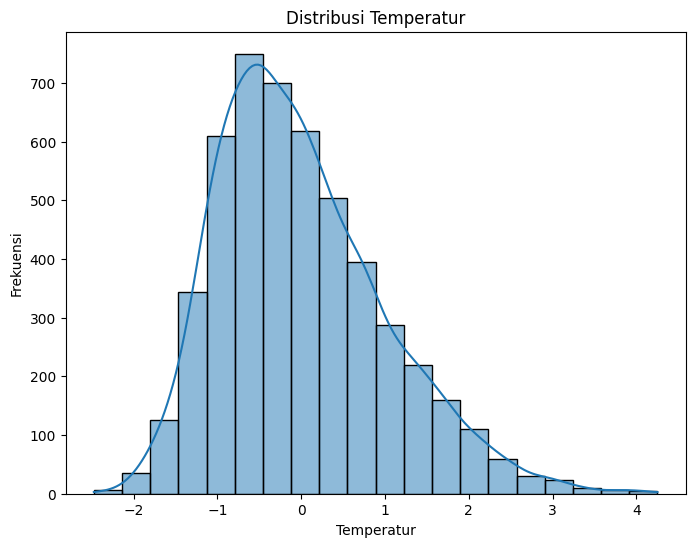

In [60]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Temperature'], bins=20, kde=True)
plt.title('Distribusi Temperatur')
plt.xlabel('Temperatur')
plt.ylabel('Frekuensi')
plt.show()

Setelah data distandarisasi, kita dapat melihat bahwa distribusi temperatur telah diperkecil sehingga nilai berada dalam rentang yang lebih sempit (biasanya sekitar -3 hingga 3 setelah standar scaler).

Sumbu horizontal (temperatur) sekarang memiliki nilai yang lebih kecil dan simetris sekitar nilai 0.

Hal ini menunjukkan bahwa setelah standarisasi, data memiliki distribusi yang lebih terpusat dengan mean mendekati 0 dan deviasi standar mendekati 1.

# Feature Selection

In [62]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X, y, random_state=42)

mi_df = pd.DataFrame({
    'Feature': X.columns,
    'MI_Score': mi_scores
}).sort_values(by='MI_Score', ascending=False)
mi_df

,Feature,MI_Score
6,CO,0.892075
7,Proximity_to_Industrial_Areas,0.759746
4,NO2,0.478531
5,SO2,0.451702
0,Temperature,0.417376
8,Population_Density,0.326411
1,Humidity,0.290378
3,PM10,0.248696
2,PM2.5,0.120626


CO memiliki MI Score tertinggi (0.892075), yang berarti bahwa fitur ini sangat berhubungan dengan target dan memiliki banyak informasi yang relevan.

Proximity_to_Industrial_Areas (0.759746) juga menunjukkan hubungan yang cukup kuat dengan target.

NO2, SO2, dan Temperature memiliki MI yang lebih rendah, tetapi masih penting dalam model.

PM10 dan PM2.5 memiliki MI yang lebih rendah, yang menunjukkan bahwa fitur ini kurang relevan dalam memprediksi target dibandingkan fitur lainnya.

# Split Data

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X[mi_df[mi_df['MI_Score'] > 0.1]['Feature'].values], y, test_size=0.25, random_state=42)

# Modeling dan Evaluasi

In [72]:
from sklearn.metrics import classification_report

def evaluate_model(model):

    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    print('Train Dataset:')
    print(classification_report(y_train, y_pred_train))
    print('Test Dataset:')
    print(classification_report(y_test, y_pred_test))

In [73]:
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier()
evaluate_model(decision)

Train Dataset:
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00      1492
   Hazardous       1.00      1.00      1.00       368
    Moderate       1.00      1.00      1.00      1119
        Poor       1.00      1.00      1.00       771

    accuracy                           1.00      3750
   macro avg       1.00      1.00      1.00      3750
weighted avg       1.00      1.00      1.00      3750

Test Dataset:
              precision    recall  f1-score   support

        Good       0.99      0.99      0.99       508
   Hazardous       0.78      0.77      0.77       132
    Moderate       0.95      0.91      0.93       381
        Poor       0.75      0.80      0.77       229

    accuracy                           0.91      1250
   macro avg       0.87      0.87      0.87      1250
weighted avg       0.91      0.91      0.91      1250



Text(50.722222222222214, 0.5, 'True Labels')

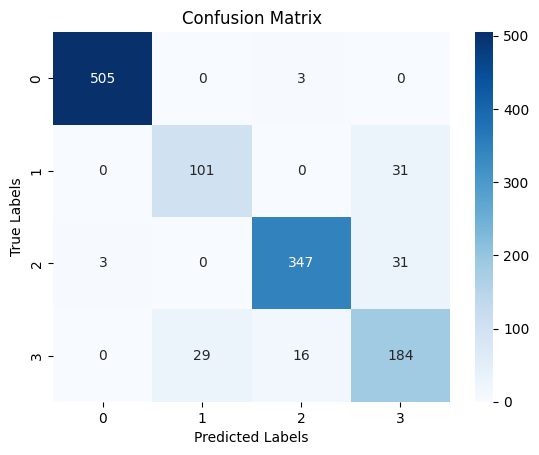

In [76]:
from sklearn.metrics import confusion_matrix
y_pred = decision.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

Sumbu Vertikal (True Labels): Mewakili label sebenarnya dari data (y_test).

Sumbu Horizontal (Predicted Labels): Mewakili label yang diprediksi oleh model (y_pred_test).

Model menunjukkan performa yang sangat baik dalam memprediksi kelas dengan akurasi yang tinggi, terutama pada kelas-kelas yang paling dominan. Sebagai contoh, pada kelas 0 (505 prediksi benar), kelas 1 (101 prediksi benar), dan kelas 2 (347 prediksi benar), model menunjukkan banyak prediksi yang tepat.

Kelas 3 menunjukkan lebih banyak kesalahan prediksi dibandingkan kelas lainnya. Meskipun ada 184 prediksi yang benar, ada 29 data kelas 3 yang salah diprediksi sebagai kelas 1, dan 16 data kelas 3 yang diprediksi sebagai kelas 2. Ini menunjukkan bahwa model kesulitan membedakan kelas 3 dari kelas lainnya.

Kelas 1 dan kelas 3 saling terprediksi dengan kesalahan. Ada 31 data kelas 1 yang diprediksi sebagai kelas 3, dan ada 29 data kelas 3 yang diprediksi sebagai kelas 1. Ini menunjukkan bahwa ada kebingungannya di antara kelas 1 dan 3, mungkin karena kedekatan atau kesamaan fitur antara kedua kelas tersebut.

Model sangat baik dalam mengidentifikasi kelas 0 dan kelas 2, karena angka pada diagonal utama (505 dan 347) sangat tinggi, menunjukkan tingkat prediksi yang akurat.

Secara keseluruhan, confusion matrix ini menunjukkan bahwa model telah berhasil memprediksi sebagian besar data dengan akurat, tetapi masih ada ruang untuk meningkatkan prediksi pada beberapa kelas, khususnya kelas 3.